In [16]:
### Import library and packages for Performing Decision tree
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

In [17]:
    ### Import dataset to load data 
Market_recovery_dataset = pd.read_csv('E:/SEM2/PYTHON/CA02/Datasets/Micro-Market_Recovery_Program_-_Violations_and_Inspections.csv',sep=',')

In [18]:
#### Glance  of 10 rows from the dataset
Market_recovery_dataset.head(1)

,Template Type,Permit_or_Case_Type,Permit or Case Description,Permit or Case Primary Key,Inspection Number,Inspection Completed Date and Time,Inspected By,Inspection Type,Partial Inspection,Trip Number,...,Community Area,Ward,X Coord,Y Coord,Latitude,Longitude,Central Business District,Address Key,Address Grouping Key,Location
0,BLDG,EL_PERM,PERMIT - ELECTRIC WIRING,1864869,2014253,07/27/2009 04:31:05 PM,PCR30745,EL_PERMIT,N,1,...,42,20,NaN,NaN,NaN,NaN,NaN,441262,19588,NaN


In [19]:
## Total Length of the dataset
print(len(Market_recovery_dataset))

216109


In [20]:
# Plotting Correlation Heatmap
corrs = Market_recovery_dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')

'corrheatmap.html'

In [21]:
## Shape of the dataset includes 216109 rows and 43 columns
print(Market_recovery_dataset.shape)

(216109, 43)


In [22]:
## Drop un-wanted columns from the dataset whcih are not helpful for prediction 
market_recovery_new = Market_recovery_dataset.drop(['Template Type','Permit or Case Description','Inspection Completed Date and Time','Inspection Waived Date and Time','Community Area','Ward','X Coord','Y Coord','Latitude','Longitude','Address Key','Address Grouping Key','Location','Modified Date/Time','Violation Complied Date','Violation Description','Violation Code Book Text','Suffix','Post Direction','Zip Code',
                                                   'Violation Comments','Violation Date','Violation Additional Comments','Violation Additional Comments2','Violation Sequence Number'], axis=1)

In [23]:
### View for first 10 records for the new dataset after dropping the columns
market_recovery_new.head(1)

,Permit_or_Case_Type,Permit or Case Primary Key,Inspection Number,Inspected By,Inspection Type,Partial Inspection,Trip Number,Inspection Waived,Inspection Status,Violation Primary Key,Violation Code,Violation Location,Violation Status,MMRP Zone,Street Number,Pre-Direction,Street Name,Central Business District
0,EL_PERM,1864869,2014253,PCR30745,EL_PERMIT,N,1,N,CLOSED,NaN,NaN,NaN,NaN,West Woodlawn,6414,S,COTTAGE GROVE,NaN


In [24]:
### Drop missing values 

market_recovery =  market_recovery_new
###
### market_recovery_new.dropna()

In [25]:
market_recovery.columns

Index(['Permit_or_Case_Type', 'Permit or Case Primary Key',
       'Inspection Number', 'Inspected By', 'Inspection Type',
       'Partial Inspection', 'Trip Number', 'Inspection Waived',
       'Inspection Status', 'Violation Primary Key', 'Violation Code',
       'Violation Location', 'Violation Status', 'MMRP Zone', 'Street Number',
       'Pre-Direction', 'Street Name', 'Central Business District'],
      dtype='object')

In [26]:
## Final dataset for the dataset of market and recovery columns with proper column names here also the column names are replaced with proper names
market_recovery.columns = ['Permit_or_Case_Type','Permit_or_Case_Primary_Key','Inspection_Number','Inspected_By','Inspection_Type','Partial_Inspection'
                           ,'Trip_Number','Inspection_Waived','Inspection_Status', 'Violation_Primary_Key','Violation_Code','Violation_Location','Violation_Status','MMRP_Zone', 'Street_Number',
       'Pre_Direction', 'Street_Name', 'Central_Business_District']

In [27]:
# Plotting Correlation Heatmap
corrs = market_recovery.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')

'corrheatmap.html'

In [205]:
#Correlation with output variable
cor_target = abs(cor["Inspection_Status"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Inspection_Status    1.0
Name: Inspection_Status, dtype: float64

In [206]:
## For preprocessing and working on the dataset importing the library 

from sklearn import preprocessing

In [207]:
#### Impute the missing values for columns in the dataset which was used for logistic regression 
imp_values = SimpleImputer(strategy="most_frequent")

In [208]:
replace_Inspected_By = market_recovery['Inspected_By'].values
replace_Inspection_Status = market_recovery['Inspection_Status'].values
replace_Violation_Primary_Key = market_recovery['Violation_Primary_Key'].values
replace_Violation_Code = market_recovery['Violation_Code'].values
replace_Violation_Location = market_recovery['Violation_Location'].values
replace_Violation_Status = market_recovery['Violation_Status'].values

In [209]:
## Impute the missing values in the columns
market_recovery['Inspected_By'] = imp_values.fit_transform(market_recovery[['Inspected_By']]).ravel()
market_recovery['Inspection_Status'] = imp_values.fit_transform(market_recovery[['Inspection_Status']]).ravel()
market_recovery['Violation_Primary_Key'] = imp_values.fit_transform(market_recovery[['Violation_Primary_Key']]).ravel()
market_recovery['Violation_Code'] = imp_values.fit_transform(market_recovery[['Violation_Code']]).ravel()
market_recovery['Violation_Location'] = imp_values.fit_transform(market_recovery[['Violation_Location']]).ravel()

In [210]:
market_recovery['Inspection_Waived'] = imp_values.fit_transform(market_recovery[['Inspection_Waived']]).ravel()

In [211]:
market_recovery['Partial_Inspection'] = imp_values.fit_transform(market_recovery[['Partial_Inspection']]).ravel()

In [212]:
market_recovery['Violation_Status'] = imp_values.fit_transform(market_recovery[['Violation_Status']]).ravel()

In [28]:
market_recovery.isnull().sum()

Permit_or_Case_Type                0
Permit_or_Case_Primary_Key         0
Inspection_Number                  0
Inspected_By                    3028
Inspection_Type                    0
Partial_Inspection                 5
Trip_Number                        0
Inspection_Waived               4054
Inspection_Status                  0
Violation_Primary_Key          37981
Violation_Code                 37981
Violation_Location             37999
Violation_Status              132923
MMRP_Zone                          0
Street_Number                      0
Pre_Direction                      0
Street_Name                        0
Central_Business_District     213522
dtype: int64

In [214]:
## Printing the dataset with new column names
print(market_recovery)

       Permit_or_Case_Type  Permit_or_Case_Primary_Key  Inspection_Number  \
0                  EL_PERM                     1864869            2014253   
1                RENO_PERM                     1518016            1716399   
2                  ES_PERM                      741255             196798   
3                RENO_PERM                     1755375            1824188   
4                  ES_PERM                      741218             712896   
...                    ...                         ...                ...   
216104            TB_COMPL                     2719578           11723474   
216105            TB_COMPL                     2462101           12091225   
216106           STF_COMPL                     2460151           10929757   
216107           BLDG_PERM                     1429445           10924124   
216108            TB_COMPL                     2458064           11681806   

       Inspected_By Inspection_Type Partial_Inspection  Trip_Number  \
0   

In [380]:
### Feature selection for columns 
feature_columns = ['Inspection_Number'
                    ,'Trip_Number','Inspection_Waived', 'Violation_Primary_Key','Violation_Location','Violation_Status']
target_column = ['Inspection_Status']

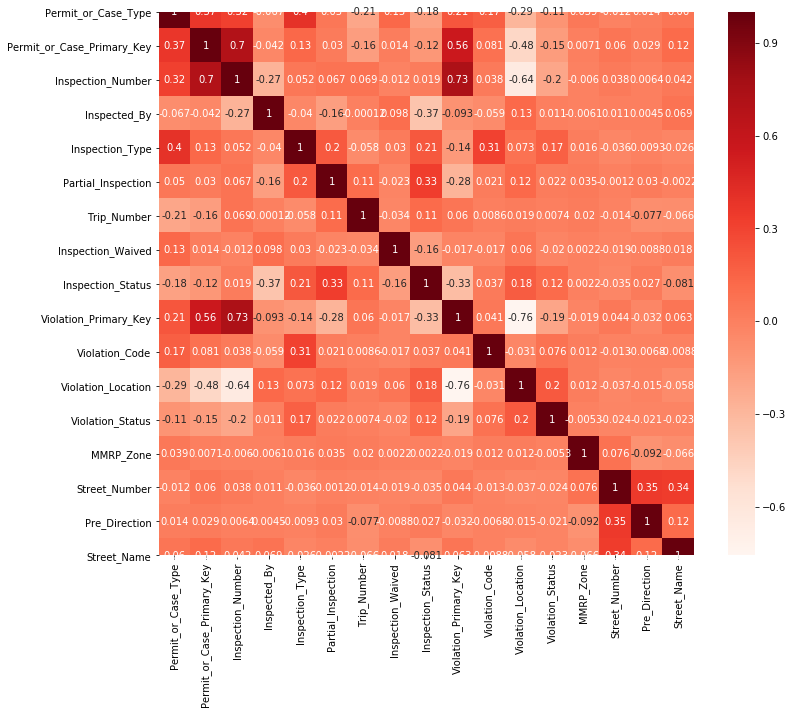

In [381]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = market_recovery.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [382]:
print(feature_columns)
print(target_column)

['Inspection_Number', 'Trip_Number', 'Inspection_Waived', 'Violation_Primary_Key', 'Violation_Location', 'Violation_Status']
['Inspection_Status']


In [383]:
number = preprocessing.LabelEncoder()
market_recovery['Permit_or_Case_Type'] = number.fit_transform(market_recovery.Permit_or_Case_Type)

market_recovery['Inspected_By'] = number.fit_transform(market_recovery.Inspected_By)

In [384]:
market_recovery['Inspection_Number'] = number.fit_transform(market_recovery.Inspection_Number)
market_recovery['Partial_Inspection'] = number.fit_transform(market_recovery.Partial_Inspection)
market_recovery['Inspection_Waived'] = number.fit_transform(market_recovery.Inspection_Waived)
market_recovery['Violation_Primary_Key'] = number.fit_transform(market_recovery.Violation_Primary_Key)
market_recovery['Violation_Code'] = number.fit_transform(market_recovery.Violation_Code)
market_recovery['Violation_Location'] = number.fit_transform(market_recovery.Violation_Location)
market_recovery['Violation_Status'] = number.fit_transform(market_recovery.Violation_Status)
market_recovery['Inspection_Status'] = number.fit_transform(market_recovery.Inspection_Status)

market_recovery['Inspection_Status'] = number.fit_transform(market_recovery.Inspection_Status)

In [385]:
market_recovery['Inspection_Type'] = number.fit_transform(market_recovery.Inspection_Type)
market_recovery['MMRP_Zone'] = number.fit_transform(market_recovery.MMRP_Zone)
market_recovery['Street_Number'] = number.fit_transform(market_recovery.Street_Number)
market_recovery['Pre_Direction'] = number.fit_transform(market_recovery.Pre_Direction)
market_recovery['Street_Name'] = number.fit_transform(market_recovery.Street_Name)


In [386]:
market_recovery.head(10)

,Permit_or_Case_Type,Permit_or_Case_Primary_Key,Inspection_Number,Inspected_By,Inspection_Type,Partial_Inspection,Trip_Number,Inspection_Waived,Inspection_Status,Violation_Primary_Key,Violation_Code,Violation_Location,Violation_Status,MMRP_Zone,Street_Number,Pre_Direction,Street_Name,Central_Business_District
0,10,1864869,21261,426,17,0,1,0,1,1726,329,11277,4,13,1949,2,53,NaN
1,27,1518016,16423,286,62,0,1,0,4,1726,329,11277,4,13,1917,2,53,NaN
2,13,741255,1248,56,19,0,1,0,4,1726,329,11277,4,13,1960,2,53,NaN
3,27,1755375,17489,426,58,0,1,0,1,1726,329,11277,4,13,1917,2,53,NaN
4,13,741218,4985,56,19,0,1,0,4,1726,329,11277,4,13,1883,2,53,NaN
5,10,1685540,13565,426,17,0,1,0,1,1726,329,11277,4,13,1955,2,53,NaN
6,33,2864168,61627,73,37,0,1,0,2,157224,340,86,4,13,1954,2,53,NaN
7,27,2726946,56258,128,51,0,2,0,4,1726,329,11277,4,13,1883,2,53,NaN
8,13,729979,1431,166,19,0,1,0,4,1726,329,11277,4,13,1873,2,53,NaN
9,13,1830273,26882,56,19,0,1,0,4,1726,329,11277,4,13,1917,2,53,NaN


In [387]:
X = market_recovery[feature_columns] # Features
y = market_recovery[target_column] # Target variable

In [388]:
from sklearn.model_selection import train_test_split

In [389]:
## Function for spliting the dataset into 70 percent testing data and 30 percent training data 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)


In [390]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [391]:
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

In [392]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [393]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9232335384757763
